<a href="https://colab.research.google.com/github/Cansuuzum-38/BreastUltrasound-Image-Clasification/blob/main/Random_Forest_Malware.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score
import time

In [ ]:
data=pd.read_csv("/content/Malware dataset.csv")
df = data.copy()

In [ ]:
df.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [ ]:
df['state'].value_counts()

,count
state,
0,60933
4096,14757
8192,4133
12288,2714
1007616,1021
...,...
835584,1
167936,1
6754304,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 35 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   hash               100000 non-null  object
 1   millisecond        100000 non-null  int64 
 2   classification     100000 non-null  object
 3   state              100000 non-null  int64 
 4   usage_counter      100000 non-null  int64 
 5   prio               100000 non-null  int64 
 6   static_prio        100000 non-null  int64 
 7   normal_prio        100000 non-null  int64 
 8   policy             100000 non-null  int64 
 9   vm_pgoff           100000 non-null  int64 
 10  vm_truncate_count  100000 non-null  int64 
 11  task_size          100000 non-null  int64 
 12  cached_hole_size   100000 non-null  int64 
 13  free_area_cache    100000 non-null  int64 
 14  mm_users           100000 non-null  int64 
 15  map_count          100000 non-null  int64 
 16  hiwater_rss        10

In [ ]:
df.dtypes

,0
hash,object
millisecond,int64
classification,object
state,int64
usage_counter,int64
prio,int64
static_prio,int64
normal_prio,int64
policy,int64
vm_pgoff,int64


In [ ]:
df.shape

(100000, 35)

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
millisecond,100000.0,4.995000e+02,288.676434,0.000000e+00,2.497500e+02,4.995000e+02,7.492500e+02,9.990000e+02
state,100000.0,1.577683e+05,936172.583334,0.000000e+00,0.000000e+00,0.000000e+00,4.096000e+03,4.326605e+07
usage_counter,100000.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
prio,100000.0,3.069706e+09,296306.144183,3.069190e+09,3.069446e+09,3.069698e+09,3.069957e+09,3.070222e+09
static_prio,100000.0,1.818390e+04,4609.792765,1.398800e+04,1.435200e+04,1.615900e+04,2.218200e+04,3.185500e+04
normal_prio,100000.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
policy,100000.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
vm_pgoff,100000.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
vm_truncate_count,100000.0,1.531274e+04,3256.475008,9.695000e+03,1.264800e+04,1.524500e+04,1.766300e+04,2.715700e+04
task_size,100000.0,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00


In [ ]:
df.isnull().sum()

,0
hash,0
millisecond,0
classification,0
state,0
usage_counter,0
prio,0
static_prio,0
normal_prio,0
policy,0
vm_pgoff,0


In [ ]:
df.columns

Index(['hash', 'millisecond', 'classification', 'state', 'usage_counter',
       'prio', 'static_prio', 'normal_prio', 'policy', 'vm_pgoff',
       'vm_truncate_count', 'task_size', 'cached_hole_size', 'free_area_cache',
       'mm_users', 'map_count', 'hiwater_rss', 'total_vm', 'shared_vm',
       'exec_vm', 'reserved_vm', 'nr_ptes', 'end_data', 'last_interval',
       'nvcsw', 'nivcsw', 'min_flt', 'maj_flt', 'fs_excl_counter', 'lock',
       'utime', 'stime', 'gtime', 'cgtime', 'signal_nvcsw'],
      dtype='object')

In [ ]:
df1=df.dropna(how="any",axis=0)
df1.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,malware,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [ ]:
df1["classification"].value_counts()

,count
classification,
malware,50000
benign,50000


In [ ]:
df1['classification'] = df1.classification.map({'benign':0, 'malware':1})

In [ ]:
df1.head()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
0,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,0,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
1,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,1,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
2,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,2,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
3,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,3,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0
4,42fb5e2ec009a05ff5143227297074f1e9c6c3ebb9c914...,4,1,0,0,3069378560,14274,0,0,0,...,0,0,120,0,3204448256,380690,4,0,0,0


In [ ]:
df1.tail()

,hash,millisecond,classification,state,usage_counter,prio,static_prio,normal_prio,policy,vm_pgoff,...,nivcsw,min_flt,maj_flt,fs_excl_counter,lock,utime,stime,gtime,cgtime,signal_nvcsw
99995,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,995,1,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99996,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,996,1,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99997,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,997,1,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99998,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,998,1,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0
99999,025c63d266e05d9e3bd57dd9ebd0abe904616f569fe4e2...,999,1,4096,0,3070148608,13988,0,0,0,...,2,1,120,0,3204448256,371979,3,0,0,0


/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


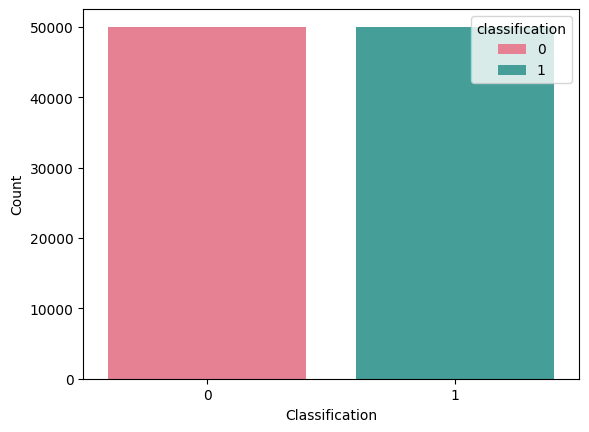

In [ ]:
counts = df1['classification'].value_counts();
palette = sns.color_palette("husl", len(counts))
sns.barplot(x=counts.index, y=counts.values, hue=counts.index, palette=palette)
plt.xlabel('Classification');
plt.ylabel('Count');

plt.show();

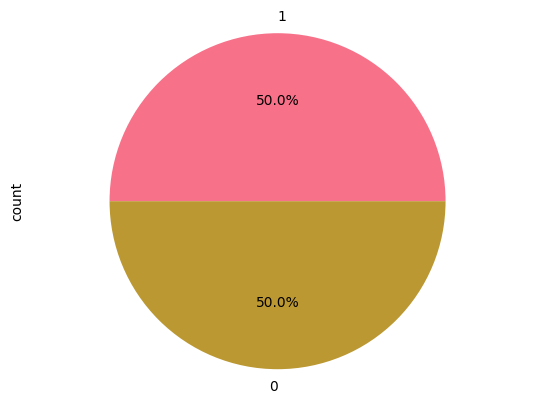

In [ ]:
df1["classification"].value_counts().plot(kind="pie", autopct="%1.1f%%", colors=sns.color_palette("husl"))
plt.axis("equal")
plt.show()

In [ ]:
# Eksik değerleri temizleme
df1 = df.dropna(how="any", axis=0)  # Eksik verileri silme

In [ ]:
# Hedef değişkeni sayısallaştırma
df1['classification'] = df1['classification'].map({'benign': 0, 'malware': 1})

In [ ]:
# Sayısal olmayan sütunları çıkartalım
df_numeric = df1.select_dtypes(include=[np.number])  # Sadece sayısal sütunlar

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Sadece sayısal sütunları seçelim
df_numeric = df1.select_dtypes(include=[np.number]).drop(columns=['classification'])  # 'classification' dışındaki sayısal sütunlar

# MinMaxScaler kullanarak tüm sayısal sütunları normalize etme
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(df_numeric)

# Normalleştirilmiş veriyi tekrar bir DataFrame'e çevirme
df_normalized = pd.DataFrame(X_normalized, columns=df_numeric.columns)

# Hedef değişkeni ayırma
y = df1["classification"]

# Eğitim ve test setlerine bölme
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(df_normalized, y, test_size=0.3, random_state=1)


In [ ]:
from sklearn.feature_selection import mutual_info_classif
import pandas as pd

# Information Gain hesaplama
mutual_info = mutual_info_classif(x_train, y_train)

# Sonuçları bir DataFrame'e çevirme ve sıralama
mi_series = pd.Series(mutual_info, index=df_numeric.columns).sort_values(ascending=False)
print("Mutual Information Scores:\n", mi_series)


Mutual Information Scores:
 static_prio          0.687563
nvcsw                0.668956
utime                0.652700
vm_truncate_count    0.630949
prio                 0.592098
map_count            0.502514
mm_users             0.337071
total_vm             0.285135
reserved_vm          0.250056
nivcsw               0.241293
exec_vm              0.199638
free_area_cache      0.178396
last_interval        0.156949
shared_vm            0.092250
end_data             0.090356
maj_flt              0.089900
state                0.069042
gtime                0.053935
fs_excl_counter      0.028572
min_flt              0.018112
stime                0.011000
signal_nvcsw         0.002652
normal_prio          0.002577
cgtime               0.002506
cached_hole_size     0.001192
task_size            0.000540
millisecond          0.000000
policy               0.000000
vm_pgoff             0.000000
hiwater_rss          0.000000
usage_counter        0.000000
nr_ptes              0.000000
lock        

In [ ]:
# 0.1'den büyük olan öznitelikleri seçme
selected_features = mi_series[mi_series > 0.1].index
print("Seçilen Öznitelikler:\n", selected_features)

# Seçilen özniteliklerle yeni bir X matrisi oluşturma
X_selected = df1[selected_features]


Seçilen Öznitelikler:
 Index(['static_prio', 'nvcsw', 'utime', 'vm_truncate_count', 'prio',
       'map_count', 'mm_users', 'total_vm', 'reserved_vm', 'nivcsw', 'exec_vm',
       'free_area_cache', 'last_interval'],
      dtype='object')


In [ ]:
from sklearn.feature_selection import chi2
import pandas as pd

# Seçilen öznitelikler (Information Gain ile seçtiğiniz öznitelikler)
X_selected = df1[['static_prio', 'nvcsw', 'utime', 'vm_truncate_count', 'prio',
                  'map_count', 'mm_users', 'total_vm', 'reserved_vm', 'nivcsw',
                  'exec_vm', 'free_area_cache', 'last_interval']]

# Chi-Square testi (pozitif sayısal değerler için kullanılır)
chi_scores, p_values = chi2(X_selected, y)

# Chi-Square sonuçlarını bir DataFrame'e çevirme ve sıralama
chi_series = pd.Series(chi_scores, index=X_selected.columns).sort_values(ascending=False)
print("Chi-Square Scores:\n", chi_series)

# Ayrıca p-values değerlerini de görmek isterseniz
p_values_series = pd.Series(p_values, index=X_selected.columns).sort_values(ascending=False)
print("\nP-Values:\n", p_values_series)


Chi-Square Scores:
 map_count            1.201734e+07
static_prio          1.181309e+07
vm_truncate_count    8.720753e+06
utime                3.653671e+06
nvcsw                3.572497e+06
nivcsw               1.742535e+05
total_vm             1.284080e+05
reserved_vm          8.704946e+04
free_area_cache      5.921604e+04
prio                 3.462974e+04
exec_vm              2.530067e+04
last_interval        1.346948e+04
mm_users             8.589701e+03
dtype: float64

P-Values:
 static_prio          0.0
nvcsw                0.0
utime                0.0
vm_truncate_count    0.0
prio                 0.0
map_count            0.0
mm_users             0.0
total_vm             0.0
reserved_vm          0.0
nivcsw               0.0
exec_vm              0.0
free_area_cache      0.0
last_interval        0.0
dtype: float64


In [ ]:
# Örneğin, en yüksek Chi-Square skorlarına sahip ilk 5 özniteliği seçebilirsiniz:
important_features = chi_series.head(5).index
X_chi_selected = df1[important_features]

print("Chi-Square ile Seçilen Öznitelikler:\n", important_features)


Chi-Square ile Seçilen Öznitelikler:
 Index(['map_count', 'static_prio', 'vm_truncate_count', 'utime', 'nvcsw'], dtype='object')


In [ ]:
# Chi-Square skorlarına göre ilk 15 özniteliği seçmek
important_features = chi_series.head(15).index
X_chi_selected = df1[important_features]

# Eğitim ve test verilerini bölme
x_train, x_test, y_train, y_test = train_test_split(X_chi_selected, y, test_size=0.3, random_state=1)

# Modeli tekrar eğitme ve değerlendirme
model = GaussianNB()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy with 15 features: {accuracy:.2%}")


Model Accuracy with 15 features: 60.27%


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# Hiperparametre aralıklarını tanımlama
param_grid_rf = {
    'n_estimators': [100, 200, 300],  # Ağaç sayısı
    'max_depth': [10, 20, 30],        # Ağaçların maksimum derinliği
    'min_samples_split': [2, 5, 10],  # Dallanma için minimum örnek sayısı
    'min_samples_leaf': [1, 2, 4]     # Yaprak düğümü için minimum örnek sayısı
}

# Random Forest modeli için GridSearchCV kullanımı
grid_search_rf = GridSearchCV(estimator=RandomForestClassifier(random_state=1),
                              param_grid=param_grid_rf,
                              cv=5,
                              scoring='accuracy',
                              verbose=2,
                              n_jobs=-1)

# Eğitim verisi üzerinde GridSearchCV ile modeli eğitme
grid_search_rf.fit(x_train, y_train)

# En iyi parametreleri yazdırma
print(f"En iyi parametreler: {grid_search_rf.best_params_}")

# En iyi model ile test setinde tahmin yapma
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf = best_rf_model.predict(x_test)

# Doğruluğu hesaplama
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy (optimized): {accuracy_rf:.2%}")


Fitting 5 folds for each of 81 candidates, totalling 405 fits


/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


En iyi parametreler: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Model Accuracy (optimized): 100.00%


In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(max_depth=5, n_estimators=50, random_state=1)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Adjusted Random Forest Model Accuracy: {accuracy:.2%}")


Adjusted Random Forest Model Accuracy: 98.90%
